In [14]:
# Import files
import os
import explore as e
import acquire as a
import prepare as p
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import scipy and sklearn
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from scipy import stats
import warnings
from urllib.request import urlopen
import plotly.express as px

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression

# max display
pd.set_option('display.max_columns', None)
%matplotlib notebook
warnings.filterwarnings("ignore")

# Acquire 

* Aquired data in SQL Query for Zillow 2017 real estate transactions.
* Columns: 61 
* Rows: 2152863 observations
    
    * Buisiness Goals: 
        * Construct an ML Regression model that predict propery tax assessed values.
        * Find the key drivers of property value for single family properties. 
        * Deliver a report that the data science team to utilize prediction model.
        * Make recommendations 

# Data Sample 

In [2]:
df = a.sql_query_zillow() # Zillow dataframe

In [3]:
df.head() # Raw data first 5 entries

,Unnamed: 0,propertylandusetypeid,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusedesc
0,0,261.0,1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN,Single Family Residential
1,1,261.0,15,11193347,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34585014.0,-118162010.0,11975.0,NaN,NaN,NaN,NaN,NaN,0100,PDA1*,6.037910e+07,40227.0,3101.0,NaN,97329.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2016.0,10.0,NaN,NaN,NaN,NaN,Single Family Residential
2,2,261.0,16,11215747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34563376.0,-118019104.0,9403.0,NaN,NaN,NaN,NaN,NaN,0100,PDA21*,6.037911e+07,40227.0,3101.0,NaN,97330.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2016.0,10.0,NaN,NaN,NaN,NaN,Single Family Residential
3,3,261.0,17,11229347,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34526913.0,-118050581.0,3817.0,NaN,NaN,NaN,NaN,NaN,0100,LCA21*,6.037911e+07,40227.0,3101.0,NaN,97330.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2108.0,2016.0,2108.0,174.21,NaN,NaN,NaN,Single Family Residential
4,4,261.0,20,11324547,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,3633.0,3633.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34560018.0,-118169806.0,9826.0,NaN,NaN,NaN,NaN,NaN,0100,LCA22,6.037910e+07,40227.0,3101.0,NaN,97329.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,2005.0,NaN,NaN,222321.0,296425.0,2016.0,74104.0,6941.39,NaN,NaN,NaN,Single Family Residential


In [4]:
df.shape

(2152863, 61)

# Prepare

- Removed columns that did not contain useful information
- Renamed columns to promote readability
- Checked for nulls in the data (there were none)
- Checked that column data types were appropriate
- Removed white space from values in object columns
    - Used target variable: taxvaluedollarcnt

**Outliers have been removed for this iteration of the project**



| Feature | Dictionary |
|:--------|:-----------|
|'airconditioningtypeid'| Type of cooling system present in the home.
|architecturalstyletypeid| Architechural style of the home. 
|basementsqft|	Finished living area below or partially below ground level.
|bathroomcnt|	Number of bathrooms in home including fractional bathrooms.
|bedroomcnt|	Number of bedrooms in home.
|buildingclasstypeid|	The building framing type.
|decktypeid| type of deck on parcel. 
|threequarterbathnbr| Number of 3/4 bathrooms in house.
|finishedfloor1squarefeet| Size of the finished living area on the first floor of the home. 
|calculatedfinished squarefeet| Calculated total finished living area on the home.
|finishedsquarefeet6| Base unfinished and finshed area.
|finshedsquarefeet12| Finshed living area.
|fips| Federal Information Processing Standard Code.
|longitude| Longitude of middle parcel.
|latitude| Latitude of middle parcel.
|lotsizesquarefeet| Area of the lot in square feet.
|parcelid| Unique identifier of parcels.
|taxvaluedollarcnt| The total tax assed value of the parcel.
|regionidcity| City in property is located.
|regioncounty| County in which the property is located.
|regionzip| Zip code in which the property is located. 


# Data Summary

In [5]:
df.describe().T.head(8)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2152863.0,1.076431e+06,6.214782e+05,0.0,538215.50,1076431.0,1614646.5,2152862.0
propertylandusetypeid,2152863.0,2.610000e+02,0.000000e+00,261.0,261.00,261.0,261.0,261.0
id,2152863.0,1.490834e+06,8.608785e+05,1.0,745117.00,1490613.0,2235859.5,2982282.0
parcelid,2152863.0,1.309657e+07,5.171557e+06,10711725.0,11659067.50,12598515.0,14056085.5,169601949.0
airconditioningtypeid,513889.0,2.405724e+00,3.785956e+00,1.0,1.00,1.0,1.0,13.0
architecturalstyletypeid,2393.0,7.187631e+00,2.739586e+00,2.0,7.00,7.0,7.0,21.0
basementsqft,1538.0,6.511905e+02,5.520788e+02,20.0,261.75,519.5,889.5,8516.0
bathroomcnt,2152852.0,2.230688e+00,9.992796e-01,0.0,2.00,2.0,3.0,32.0


# Explore

<IPython.core.display.Javascript object>


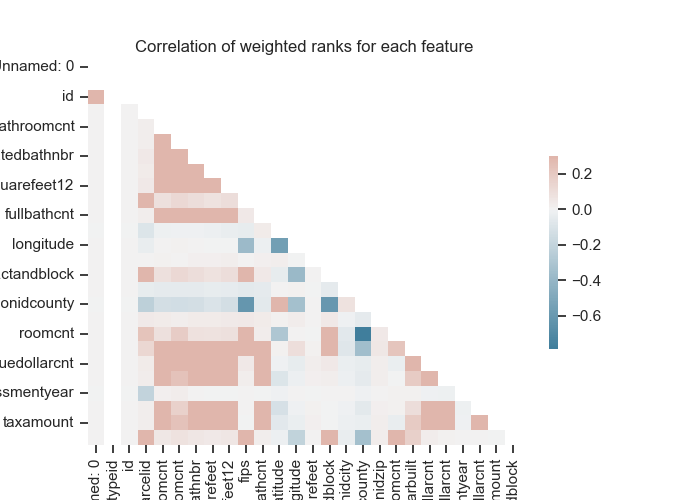

In [6]:
e.corr_ranks(df)

###### Is there a correlation between living area and home value ?

In [7]:
r2 = e.roun_fun()

<IPython.core.display.Javascript object>


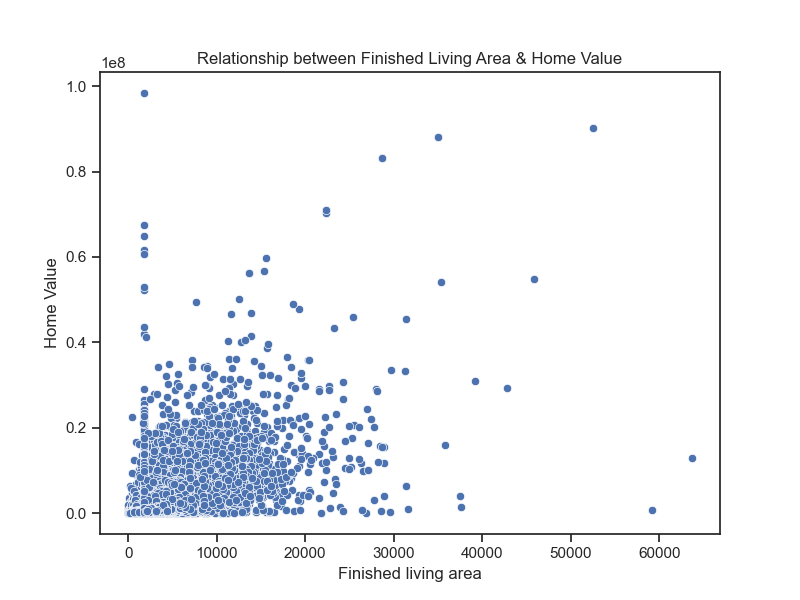

Pearson Corr Coeff: 0.59


In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=e.rts_formu().finfloorsqft12,y=e.rts_formu().homevalue)
plt.xlabel("Finished living area")
plt.ylabel("Home Value")
plt.title("Relationship between Finished Living Area & Home Value")
print("Pearson Corr Coeff: {}".format(r2(stats.pearsonr(e.rts_formu().finfloorsqft12.values.copy(),e.rts_formu().homevalue.values.copy())[0])))
plt.show()

In [9]:
alpha = e.alpha() # .95 confidence

In [10]:
stats, p = pearsonr(e.rts_formu().homevalue, e.rts_formu().finfloorsqft12) # pearsonr correlation

In [11]:
p< alpha #Confident in correlation of two variables.

True

**Takeaways**
- The plot above shows that there is a correlation between finished living area and home value.
- We can confidently say finshed living area is a driver of housing value.


In [12]:
df=e.remove_outliers()

# Distribution of Home Value

<IPython.core.display.Javascript object>


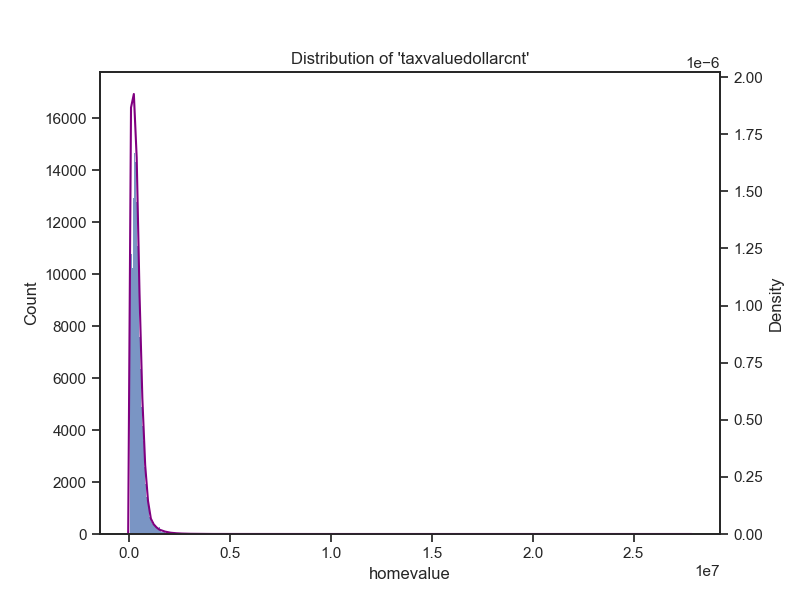

Mean Home Value Price: 461893.51
Median Home Value: 327672.0
Skewness: 20.87


In [15]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x=df.homevalue)
ax2 = ax.twinx()
sns.kdeplot(x=df.homevalue ,color="purple",ax=ax2)
plt.title("Distribution of 'taxvaluedollarcnt'")
plt.xlabel("Home Value")
plt.show()
print(
        "Mean Home Value Price: {}".format(r2(np.mean(e.rts_formu().homevalue)))
      + "\n"
      + "Median Home Value: {}".format(r2(np.median(e.rts_formu().homevalue)))
      + "\n"
      + "Skewness: {}".format(r2(stats.skew((e.rts_formu().homevalue)))))

# Scalling

In [16]:
train, validate, test = e.pull_tvt_formu()#Creating the train test dataframes

In [17]:
x_train, y_train, x_validate, y_validate, x_test, y_test = e.xy_formula(train, validate, test)

In [18]:
scaler = RobustScaler() # RB Scaler

scaler.fit(x_train) # Fitting model

RobustScaler()

<IPython.core.display.Javascript object>


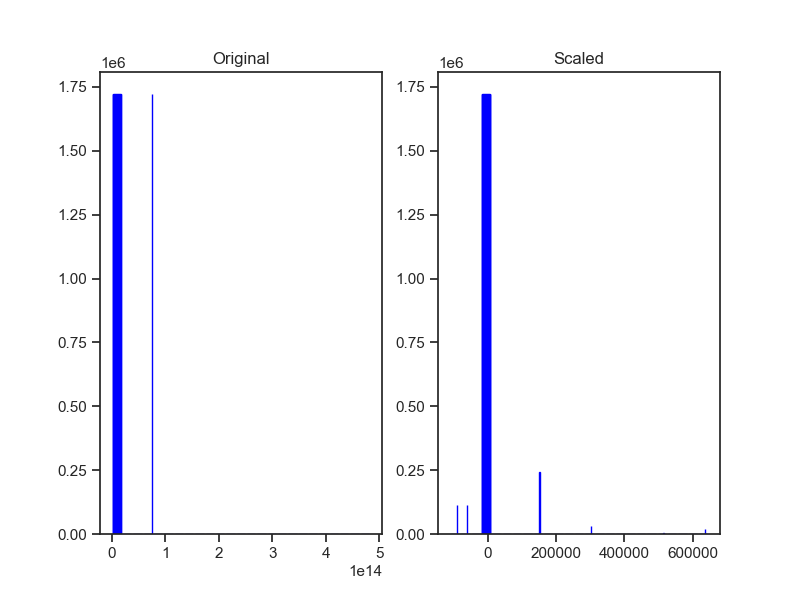

Text(0.5, 1.0, 'Scaled')

In [19]:
#Creating x_scaled df
x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

#plotting scalling information
plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='blue')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='blue')
plt.title('Scaled')

# Simple Linear Regression

In [20]:
e.slr(y_train, y_validate)

RMSE using Mean
Train/In-Sample:  696411.29 
Validate/Out-of-Sample:  715893.47
RMSE using Median
Train/In-Sample:  709170.22 
Validate/Out-of-Sample:  728525.71


# Single Linear Regression Model

In [21]:
e.slr(y_train, y_validate)

RMSE using Mean
Train/In-Sample:  696411.29 
Validate/Out-of-Sample:  715893.47
RMSE using Median
Train/In-Sample:  709170.22 
Validate/Out-of-Sample:  728525.71


# Lasso Lars Model

In [22]:
e.ll(x_train_scaled, x_validate_scaled, y_train, y_validate)

ValueError: Found input variables with inconsistent numbers of samples: [1722292, 1722291]

# Tweedie Regression Model

In [ ]:
y_train

In [ ]:
e.tr(x_train_scaled, x_validate_scaled, y_train, y_validate)

# 2nd Degree Model

In [ ]:
e.lm2_form(x_train_scaled, x_validate_scaled, x_test_scaled, y_train, y_validate)

# Test_validate models

In [ ]:
e.total_model_viz(y_validate)

# Test model

In [ ]:
e.best_test(x_test_scaled):